In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib.style 
import matplotlib as mpl 

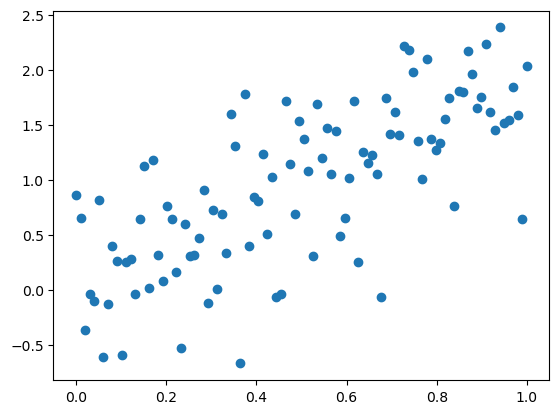

In [2]:
def polyModelWithNoise(x, theta, sigma):
    
    y = sum(t * x**i for i, t in enumerate(theta))
    y += np.random.normal(0, sigma, size=len(x))
    return y


x = np.linspace(0, 1, 100)
theta = [0, 2]
sigma = 0.5

y = polyModelWithNoise(x, theta, sigma)

plt.scatter(x, y)
plt.show()

In [3]:
theta = [-1, 0.5]


def polyGradient(x,theta):
        
    gradient = np.zeros((len(x), len(theta)))

    for i in range(len(x)):
        gradient[i, :] = np.power(x[i], np.arange(len(theta))) 

    return gradient

    


In [4]:
def sampleModel(x):
    
    return polyModelWithNoise(x,theta,sigma=0)

def samples(nsamples, width=1): 
    
    return width*np.random.rand(nsamples)

In [5]:

def avg_chisq(x, theta):
  
    return np.average((polyModelWithNoise(x,[0,2],sigma=0.5)-polyModelWithNoise(x,theta,sigma=0))**2)


def get_2d_chisq(theta0vals,theta1vals,numSamples):  
    
    N0 = len(theta0vals)
    N1 = len(theta1vals)
    
    output = np.zeros((N0,N1))
    
    for j0 in range(N0):
        for j1 in range(N1):

            theta=np.array([theta0vals[j0],theta1vals[j1]])
            x=samples(numSamples)
            
            output[j0,j1]=avg_chisq(x,theta)
            
    return output

In [6]:
def stoch_desc(x,numSteps,eta,theta,actual):
    
    dim = len(theta)
    
    chiSqArray=np.zeros(numSteps)  
    thetaArray=np.zeros((numSteps+1,dim))   
    thetaArray[0]=theta


    for i in range(numSteps): 
        x=samples(10) 
        chiSq=avg_chisq(x,theta)  
        chiSqArray[i]=chiSq 
    
        deviation=polyModelWithNoise(x,theta,sigma=0)-polyModelWithNoise(x,actual,sigma=0.5)

        theta-=eta*np.average(deviation[:,None] * polyGradient(x,theta), axis=0)  

        thetaArray[i+1]=theta
        
        
    fig, ax = plt.subplots() 
    count = np.arange(numSteps+1)
    ax.plot(count[:-1],chiSqArray,linewidth=3)
    ax.set_xlabel("Iteration")
    ax.set_ylabel(r"$\chi^2$")
        
        
    return chiSqArray, thetaArray



def quiver(theta_array):
    
    theta0vals = np.linspace(-3,3,50) 
    theta1vals = np.linspace(-3,3,50)
    chi2 = get_2d_chisq(theta0vals,theta1vals,10000)
    X,Y = np.meshgrid(theta0vals,theta1vals,indexing="ij")


    fig, ax = plt.subplots()  
    ax.contourf(X,Y,chi2,20)
    ax.contour(X,Y,chi2,20,colors="white")
    ax.set_xlabel(r"$\theta_0$")
    ax.set_ylabel(r"$\theta_1$")
    ax.quiver(theta_array[:-1,0], theta_array[:-1,1], theta_array[1:,0]-theta_array[:-1,0], theta_array[1:,1]-theta_array[:-1,1], scale_units='xy',scale=1)




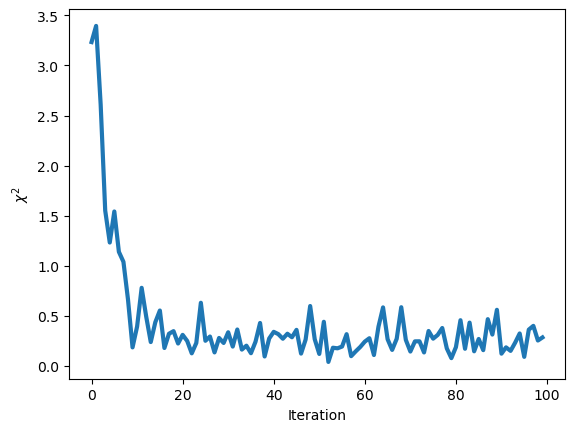

In [17]:
numSteps=100
theta=[-1, 0.5] 
eta=0.1
x = np.linspace(0, 1, 100)



u, thetaArray = stoch_desc(x,numSteps,0.1,theta, [0,2])



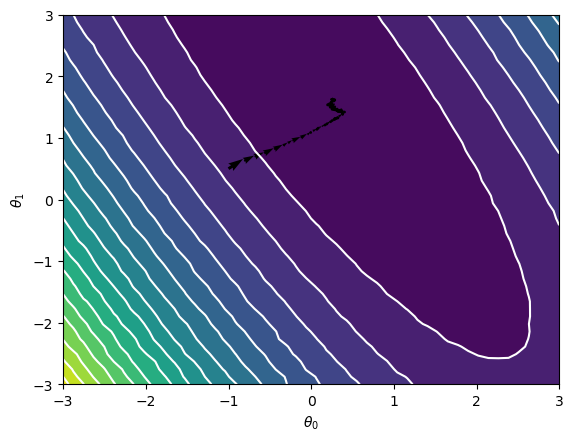

In [8]:
quiver(thetaArray)

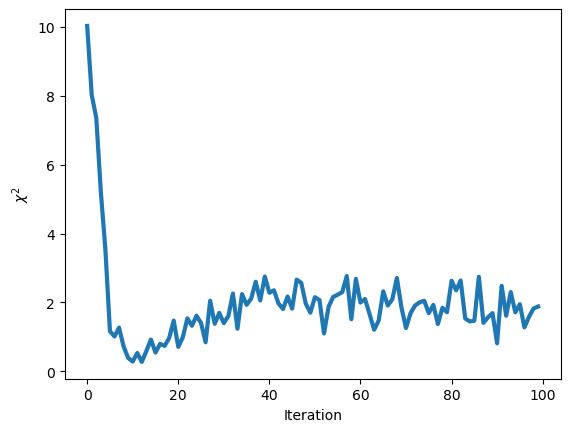

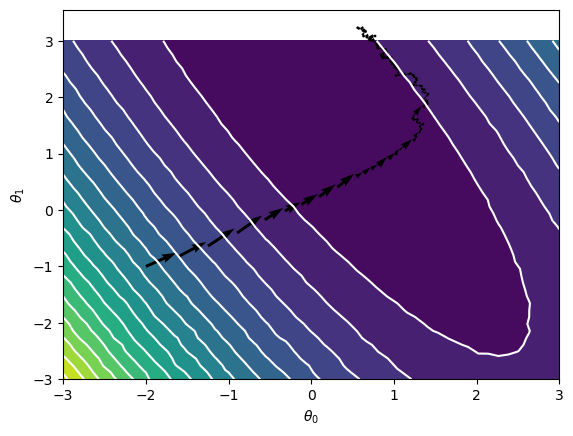

In [41]:
x = np.linspace(0, 1, 100)
sigma = 0.5

theta_1 = [-2, -1]


chiSqArray_1, thetaArray_1 = stoch_desc(x,100,0.1, theta_1, [0,2,2,2])
quiver(thetaArray_1)


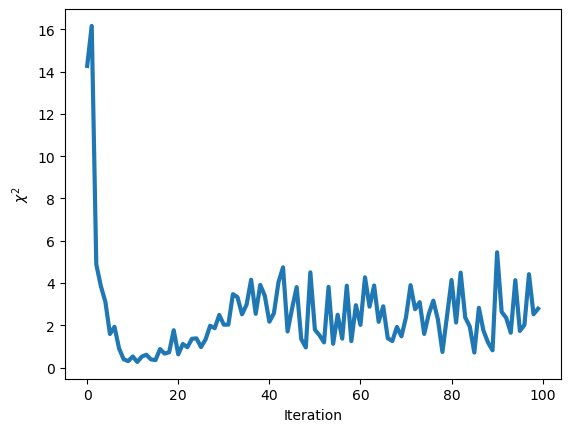

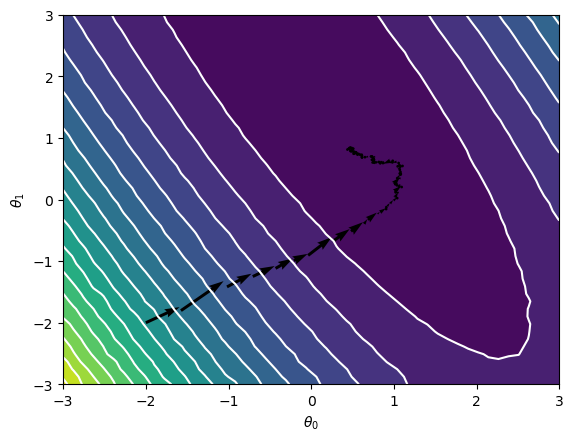

In [30]:
theta_3 = [-2, -2, 0 ,0]


chiSqArray_3, thetaArray_3 = stoch_desc(x,100,0.1, theta_3, [0,2,2,2])
quiver(thetaArray_3)


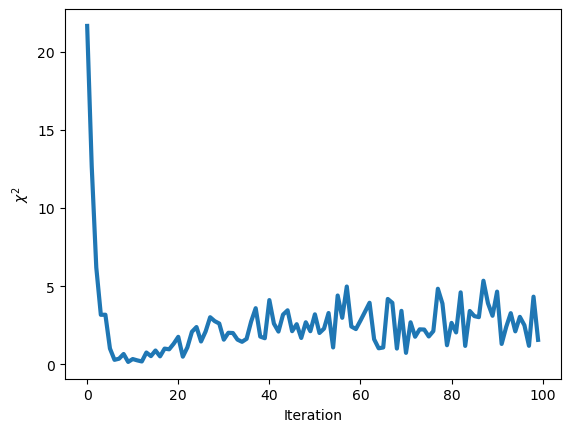

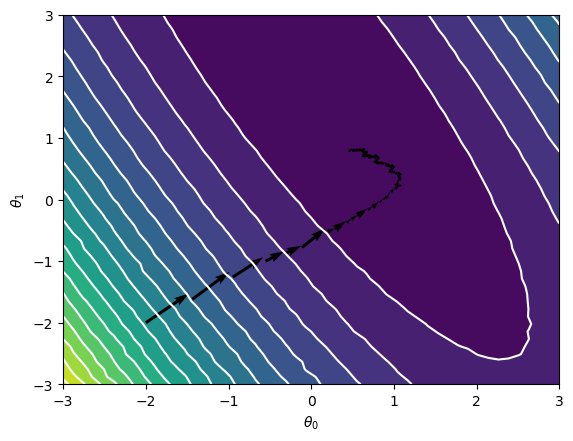

In [39]:
theta_7 = [-2, -2, 0 ,0]



chiSqArray_7, thetaArray_7 = stoch_desc(x,100,0.1, theta_7, [0,2,2,2])
quiver(thetaArray_7)

